# 4. Evalution Metrics for Classification
in the previous session we trained a model for predicting churn. How do we know if it's good?

## **4.1 Evalution metrics: session overview:**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
# !wget -P ../data $data
df = pd.read_csv("../../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_test['churn']
del df_val['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges' ]
categorical = ['gender', 
               'seniorcitizen', 
               'partner', 
               'dependents', 
               'phoneservice', 
               'multiplelines', 
               'internetservice',  
               'onlinesecurity', 
               'onlinebackup', 
               'deviceprotection', 
               'techsupport',
               'streamingtv', 
               'streamingmovies', 
               'contract', 
               'paperlessbilling',
               'paymentmethod',]

In [7]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression()
model.fit(X_train, y_train)

D:\ESTUDOS\CURSOS\ml-zoomcamp\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

## **4.2 Accuracy and dummy model**
* Evaluate the model on different thresholds
* Chack the accuracy of a dummy baselines

In [9]:
len(y_val)

1409

In [10]:
(y_val == churn_decision).sum()

np.int64(1131)

In [11]:
1128 / 1409

0.8005677785663591

In [12]:
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.592
0.15 0.667
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.794
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


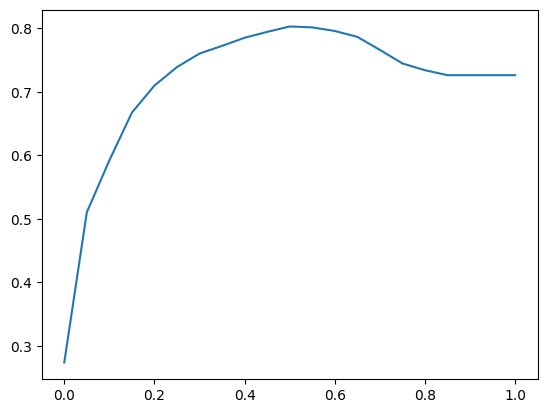

In [13]:
plt.plot(thresholds, scores)

we use our own function to calculate  accuracy, but we don't need to, we can use the scikit-learn aaccuracy_score function, wich is available in the sklearn.metrics package:

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

In [16]:
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.592
0.15 0.667
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.794
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [17]:
from collections import Counter

In [18]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

## 4.3 Confusion table
* Different types of errors and correct decisions
* Arranging them in a table

In [19]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [20]:
t = 0.5
predict_positive = (y_pred >= t )
predict_negative = (y_pred < t )

In [21]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [22]:
tn, tp

(np.int64(921), np.int64(210))

In [23]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [24]:
fp, fn

(np.int64(102), np.int64(176))

creating the confusion table with numpy:

In [25]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

In [26]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and Recall

Accuracy:

In [27]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.8026969481902059)

Precision:

In [28]:
p = tp / (tp + fp)

Recall:

In [29]:
r = tp / (fn + tp)

**Conclusion: accuracy can be misleading, especially in cases where there is class imbalance**

## **4.5 ROC curves**

### **TPR and FRP**

In [30]:
fpr = fp / (tn + fp)
fpr 

np.float64(0.09970674486803519)

In [31]:
tpr = tp / (fn + tp)
tpr 

np.float64(0.5440414507772021)

In [32]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t )
    predict_negative = (y_pred < t )

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [33]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] =  df_scores.tp / (df_scores.fn + df_scores.tp)
df_scores['fpr'] =  df_scores.fp / (df_scores.tn + df_scores.fp)

In [34]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,555,20,468,0.948187,0.542522
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,102,176,921,0.544041,0.099707
60,0.6,151,53,235,970,0.391192,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,2,373,1021,0.033679,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


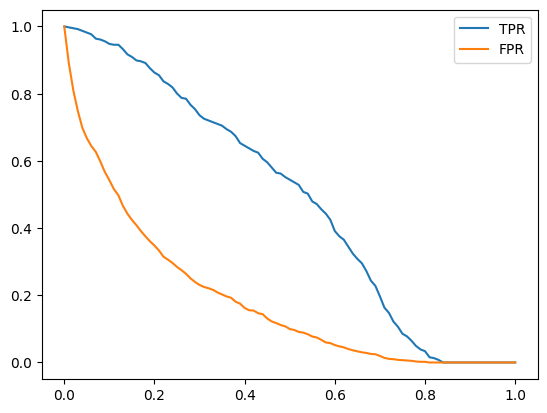

In [35]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [36]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [37]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [38]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t )
        predict_negative = (y_pred < t )
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['tpr'] =  df_scores.tp / (df_scores.fn + df_scores.tp)
    df_scores['fpr'] =  df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores

In [39]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [40]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


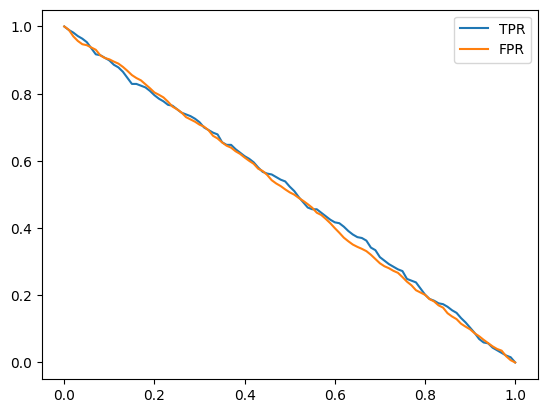

In [60]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### ideal model

In [42]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [53]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [54]:
y_ideal_pred = np.linspace(0,1, len(y_val))

In [55]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [52]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [56]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [58]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


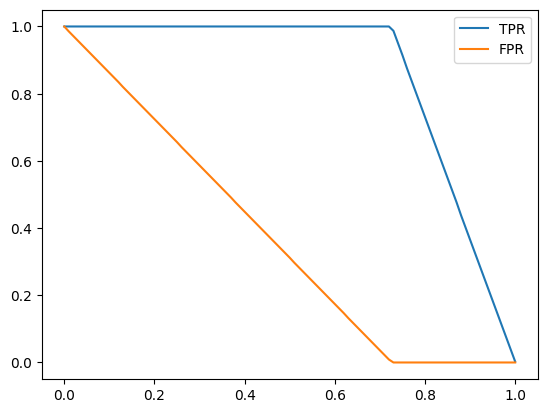

In [61]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

#### **Putting everrything together**

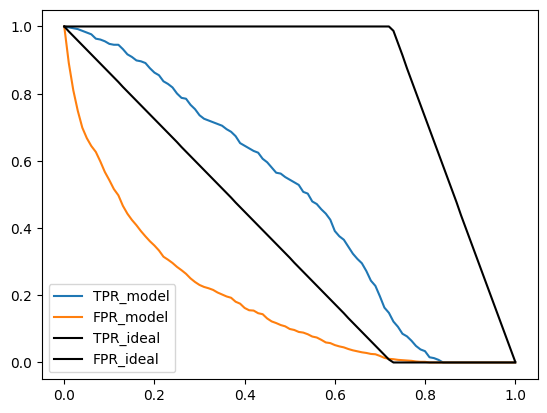

In [68]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR_model')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR_model')


#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR_random')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR_randpm')


plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR_ideal', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR_ideal',color='black')

plt.legend()

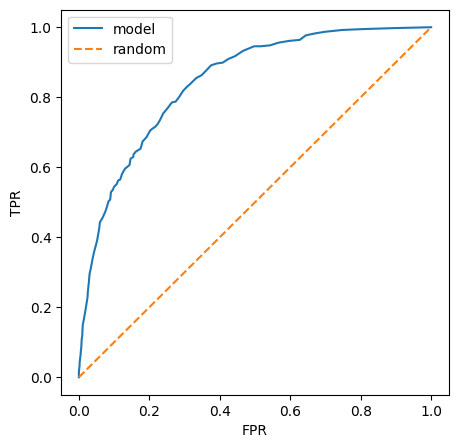

In [76]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--' )
# plt.plot(df_rand.fpr, df_rand.tpr, label='random' )
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

#### we can use sklearn to calculate the TPR and FPR and draw the roc curve :

In [77]:
from sklearn.metrics import roc_curve

In [78]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

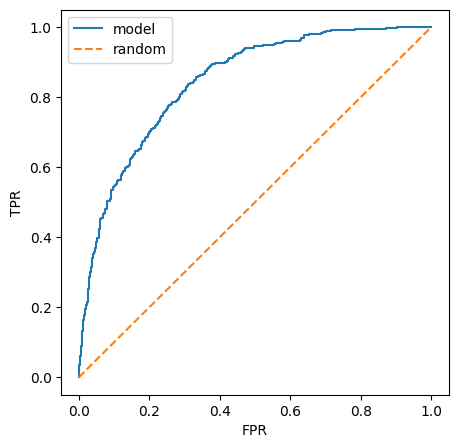

In [79]:
plt.figure(figsize=(5,5))

plt.plot(fpr,tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--' )
# plt.plot(df_rand.fpr, df_rand.tpr, label='random' )
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## 4.2 ROC AUC
* Area under the ROC curve - useful metric
* Interpretation of AUC

In [80]:
from sklearn.metrics import auc

In [81]:
auc(fpr, tpr)

0.8438150517374987

In [88]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [89]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438150517374987

In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
roc_auc_score(y_val,y_pred)

0.8438150517374987

#### What auc means:

In [95]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [98]:
import random

In [115]:
n = 1000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
success / n

0.845

doing with numpy:

In [124]:
n = 50000
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [125]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.8464)

## **4.7 Cross-Validation**
* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions